In [ ]:
#!curl -L "https://public.roboflow.ai/ds/WKkUorQ71T?key=wIBAdyawPa" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [ ]:
#Git Clone
%cd /content/
!git clone https://github.com/ultralytics/yolov5.git

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 12228, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 12228 (delta 15), reused 14 (delta 7), pack-reused 12195
Receiving objects: 100% (12228/12228), 11.98 MiB | 29.84 MiB/s, done.
Resolving deltas: 100% (8459/8459), done.


In [ ]:
#패키지 설치
%cd /content/yolov5/
!pip install -r requirements.txt

/content/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 596 kB 5.0 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
#데이터 확인
#%cd /content/yolov5/
#%cat /content/dataset/data.yaml

%cd /content/yolov5/
%cat /content/drive/MyDrive/dataset/data.yaml

/content/yolov5
names:
- head
- helmet
nc: 2
train: /content/train.txt
val: /content/val.txt


In [ ]:
%cd /
from glob import glob

#img_list = glob('/content/dataset/export/images/*.png')
img_list = glob('/content/drive/MyDrive/dataset/images/*.png')
print(len(img_list))

/
4738


In [ ]:
# train, validation 분리
from sklearn.model_selection import train_test_split

train_img_list, val_img_list = train_test_split(img_list, test_size=0.2, random_state=2000)

print(len(train_img_list), len(val_img_list))

3790 948


In [ ]:
#train/val 이미지 경로 저장.
with open('/content/train.txt', 'w') as f:
  f.write('\n'.join(train_img_list) + '\n')

with open('/content/val.txt', 'w') as f:
  f.write('\n'.join(val_img_list) + '\n')

In [ ]:
#현재 상황에 맞게 data.yaml 수정
import yaml

with open('/content/drive/MyDrive/dataset/data.yaml', 'r') as f:
  data = yaml.load(f, Loader=yaml.FullLoader)

print(data)

data['train'] = '/content/train.txt' 
data['val'] = '/content/val.txt'

with open('/content/drive/MyDrive/dataset/data.yaml', 'w') as f:
  yaml.dump(data, f)

print(data)

{'names': ['head', 'helmet'], 'nc': 2, 'train': '/content/train.txt', 'val': '/content/val.txt'}
{'names': ['head', 'helmet'], 'nc': 2, 'train': '/content/train.txt', 'val': '/content/val.txt'}


In [ ]:
%cd /content/yolov5/

#!python train.py --img 416 --batch 16 --epochs 50 --data /content/dataset/data.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name gun_yolov5s_results
!python train.py --img 416 --batch 16 --epochs 50 --data /content/drive/MyDrive/dataset/data.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name gun_yolov5s_results
#!python train.py --img 416 --batch 32 --epochs 200 --data /content/drive/MyDrive/dataset/data.yaml --cfg ./models/yolov5l.yaml --weights yolov5l.pt --name gun_yolov5s_results

/content/yolov5
train: weights=yolov5l.pt, cfg=./models/yolov5l.yaml, data=/content/drive/MyDrive/dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=32, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=gun_yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-250-g6adc53b Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0,

In [ ]:
%load_ext tensorboard
%tensorboard --logdir /content/yolov5/runs/

In [ ]:
#!zip -r /content/~/zip하고자하는폴더.zip /content/~/zip하고자하는폴더/
!zip -r /content/yolov5.zip /content/yolov5

#!unzip -qq "/content/drive/MyDrive/Colab Notebooks/challenge/data/Positive.zip"


  adding: content/yolov5/ (stored 0%)
  adding: content/yolov5/export.py (deflated 73%)
  adding: content/yolov5/requirements.txt (deflated 49%)
  adding: content/yolov5/__pycache__/ (stored 0%)
  adding: content/yolov5/__pycache__/export.cpython-37.pyc (deflated 52%)
  adding: content/yolov5/__pycache__/val.cpython-37.pyc (deflated 43%)
  adding: content/yolov5/README.md (deflated 72%)
  adding: content/yolov5/tutorial.ipynb (deflated 78%)
  adding: content/yolov5/data/ (stored 0%)
  adding: content/yolov5/data/hyps/ (stored 0%)
  adding: content/yolov5/data/hyps/hyp.scratch-high.yaml (deflated 53%)
  adding: content/yolov5/data/hyps/hyp.Objects365.yaml (deflated 40%)
  adding: content/yolov5/data/hyps/hyp.VOC.yaml (deflated 48%)
  adding: content/yolov5/data/hyps/hyp.scratch-med.yaml (deflated 53%)
  adding: content/yolov5/data/hyps/hyp.scratch-low.yaml (deflated 54%)
  adding: content/yolov5/data/SKU-110K.yaml (deflated 52%)
  adding: content/yolov5/data/images/ (stored 0%)
  adding

In [ ]:
#테스트 데이터
from IPython.display import Image
import os

val_img_path = val_img_list[1]

#!python detect.py --weights /content/yolov5/runs/train/gun_yolov5s_results/weights/best.pt --img 416 --conf 0.5 --source "{val_img_path}"

!python detect.py --weights /content/yolov5/runs/train/gun_yolov5s_results/weights/best.pt --img 416 --conf 0.5 --source /content/hard_hat_workers4937.png




detect: weights=['/content/yolov5/runs/train/gun_yolov5s_results/weights/best.pt'], source=/content/hard_hat_workers4937.png, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-220-g68ff6c9 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/hard_hat_workers4937.png: 416x416 1 helmet, 7 heads, Done. (0.009s)
Speed: 0.4ms pre-process, 9.5ms inference, 1.2ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp


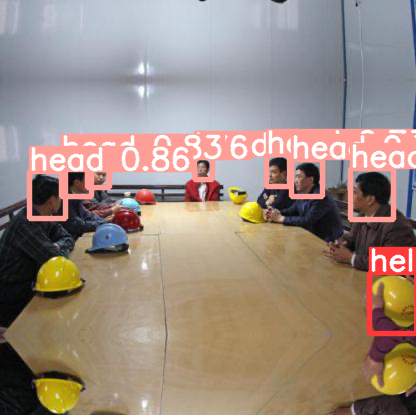

In [ ]:
#Image(os.path.join('/content/yolov5/runs/detect/exp5', os.path.basename(val_img_path)))
Image(os.path.join('/content/yolov5/runs/detect/exp', os.path.basename("/content/hard_hat_workers4937.png")))

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/gun_yolov5s_results2/weights/best.pt --img 416 --conf 0.5 --source /content/test/

detect: weights=['/content/yolov5/runs/train/gun_yolov5s_results2/weights/best.pt'], source=/content/test/, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-246-g2dd3db0 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1003 /content/test/helmet_0001.png: 288x416 1 head, 2 helmets, Done. (0.015s)
image 2/1003 /content/test/helmet_0002.png: 288x416 2 heads, 6 helmets, Done. (0.016s)
image 3/1003 /content/test/helmet_0003.jpg: 256x416 1 head, 5 helmets, Done. (0.016s)
image 4/1003 /content/test/helmet_0004.jpg: 352x416 3 heads, Done. (0.01

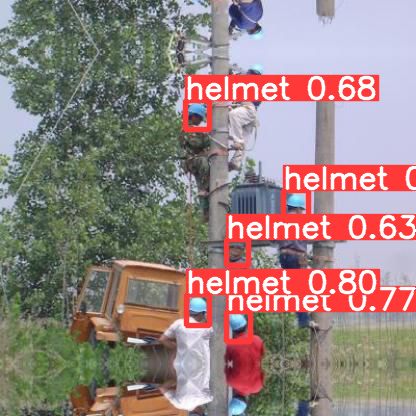

In [ ]:
Image(os.path.join('/content/yolov5/runs/detect/exp4', os.path.basename("/content/hard_hat_workers4890.png")))